# Project Title: 
### Analysis of Covid-19 cases (state-wise) and prediction of Herd Immunity in India, to conclude if schools and colleges should reopen or not in the near future.

# > Analysis of Covid-19 in India

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_df = pd.read_csv("Latest Covid-19 Data India Status.csv")
df = main_df.copy()
df

State/UTs  Total Cases  Active  Discharged  \
0                        Andaman and Nicobar         7546       5        7412   
1                             Andhra Pradesh      1983721   19549     1950623   
2                          Arunachal Pradesh        50372    2606       47520   
3                                      Assam       575220   11096      558720   
4                                      Bihar       725235     286      715303   
5                                 Chandigarh        61984      27       61146   
6                               Chhattisgarh      1003244    1700      988004   
7   Dadra and Nagar Haveli and Daman and Diu        10653       6       10643   
8                                      Delhi      1436800     498     1411235   
9                                        Goa       171944     896      167884   
10                                   Gujarat       825064     209      814778   
11                                   Haryana       770091     672      759769   
12                          Himachal Pradesh       208197    2086      202576   
13                         Jammu and Kashmir       322658    1311      316957   
14                                 Jharkhand       347406     202      342074   
15                                 Karnataka      2919711   23342     2859552   
16                                    Kerala      3565574  170031     3377691   
17                                    Ladakh        20400      72       20121   
18                               Lakshadweep        10249      54       10145   
19                            Madhya Pradesh       791970     149      781307   
20                               Maharashtra      6357833   71813     6151956   
21                                   Manipur       104791    7006       96128   
22                                 Meghalaya        69358    4734       63450   
23                                   Mizoram        45457   12434       32854   
24                                  Nagaland        28709    1397       26727   
25                                    Odisha       987956   10064      971391   
26                                Puducherry       121665     834      119031   
27                                    Punjab       599514     441      582753   
28                                 Rajasthan       953840     216      944670   
29                                    Sikkim        27908    2731       24822   
30                                Tamil Nadu      2577237   20427     2522470   
31                                 Telengana       649859    8242      637789   
32                                   Tripura        80416    2044       77601   
33                             Uttar Pradesh      1708793     570     1685449   
34                               Uttarakhand       342423     446      334609   
35                               West Bengal      1534360   10312     1505808   

    Deaths  Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
0      129              0.07                98.22             1.71  
1    13549              0.99                98.33             0.68  
2      246              5.17                94.34             0.49  
3     5404              1.93                97.13             0.94  
4     9646              0.04                98.63             1.33  
5      811              0.04                98.65             1.31  
6    13540              0.17                98.48             1.35  
7        4              0.06                99.91             0.04  
8    25067              0.03                98.22             1.74  
9     3164              0.52                97.64             1.84  
10   10077              0.03                98.75             1.22  
11    9650              0.09                98.66             1.25  
12    3535              1.00                97.30             1.70  
13    4390              0.41                98.23             1.36  
14

In [3]:
# Shape of the data set
df.shape

(36, 8)

In [4]:
# To get the list of all columns present in the data set
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

In [5]:
# To check for duplicated values
df.duplicated().sum()

0

In [6]:
# Replacing long name by short name
df = df.replace('Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu')
df.head(10)

State/UTs  Total Cases  Active  Discharged  Deaths  \
0  Andaman and Nicobar         7546       5        7412     129   
1       Andhra Pradesh      1983721   19549     1950623   13549   
2    Arunachal Pradesh        50372    2606       47520     246   
3                Assam       575220   11096      558720    5404   
4                Bihar       725235     286      715303    9646   
5           Chandigarh        61984      27       61146     811   
6         Chhattisgarh      1003244    1700      988004   13540   
7        Daman and Diu        10653       6       10643       4   
8                Delhi      1436800     498     1411235   25067   
9                  Goa       171944     896      167884    3164   

   Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
0              0.07                98.22             1.71  
1              0.99                98.33             0.68  
2              5.17                94.34             0.49  
3              1.93                97.13             0.94  
4              0.04                98.63             1.33  
5              0.04                98.65             1.31  
6              0.17                98.48             1.35  
7              0.06                99.91             0.04  
8              0.03                98.22             1.74  
9              0.52                97.64             1.84

In [7]:
# Further information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [8]:
# For statistical measure of the data set
df.describe()

Total Cases         Active    Discharged         Deaths  \
count  3.600000e+01      36.000000  3.600000e+01      36.000000   
mean   8.888377e+05   10791.888889  8.661380e+05   11907.833333   
std    1.287628e+06   30178.733935  1.246344e+06   23009.954783   
min    7.546000e+03       5.000000  7.412000e+03       4.000000   
25%    6.751450e+04     268.500000  6.287400e+04     801.000000   
50%    4.613130e+05    1354.000000  4.503970e+05    5267.000000   
75%    9.917780e+05    8697.500000  9.755442e+05   13542.250000   
max    6.357833e+06  170031.000000  6.151956e+06  134064.000000   

       Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
count         36.000000            36.000000        36.000000  
mean           2.249167            96.488333         1.262222  
std            4.915139             4.802669         0.565555  
min            0.020000            72.270000         0.040000  
25%            0.067500            97.037500         0.940000  
50%            0.600000            98.140000         1.320000  
75%            1.435000            98.630000         1.607500  
max           27.350000            99.910000         2.720000

In [9]:
# To check for any null/missing values
df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

<AxesSubplot:>

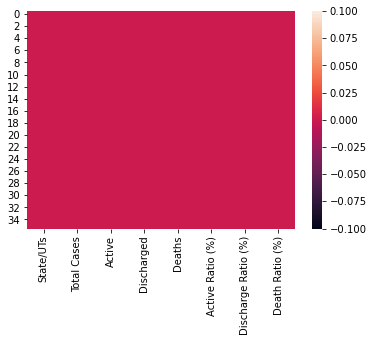

In [10]:
# Visualization for null value
sns.heatmap(df.isnull())

In [11]:
# To check for co-relations within the data set
df.corr()

Total Cases    Active  Discharged    Deaths  \
Total Cases             1.000000  0.678536    0.999899  0.909759   
Active                  0.678536  1.000000    0.668957  0.424739   
Discharged              0.999899  0.668957    1.000000  0.911148   
Deaths                  0.909759  0.424739    0.911148  1.000000   
Active Ratio (%)       -0.149492  0.115051   -0.154554 -0.144922   
Discharge Ratio (%)     0.141382 -0.098089    0.146346  0.113448   
Death Ratio (%)         0.096645 -0.167278    0.098462  0.294346   

                     Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
Total Cases                 -0.149492             0.141382         0.096645  
Active                       0.115051            -0.098089        -0.167278  
Discharged                  -0.154554             0.146346         0.098462  
Deaths                      -0.144922             0.113448         0.294346  
Active Ratio (%)             1.000000            -0.993472        -0.256376  
Discharge Ratio (%)         -0.993472             1.000000         0.144442  
Death Ratio (%)             -0.256376             0.144442         1.000000

<AxesSubplot:>

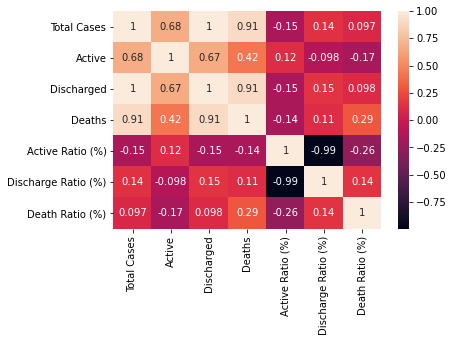

In [12]:
# Visualization of co-relations within variables
sns.heatmap(df.corr(), annot=True)

## > Visualization

### To create a Visual Report for better understanding 


<AxesSubplot:xlabel='Total Cases', ylabel='State/UTs'>

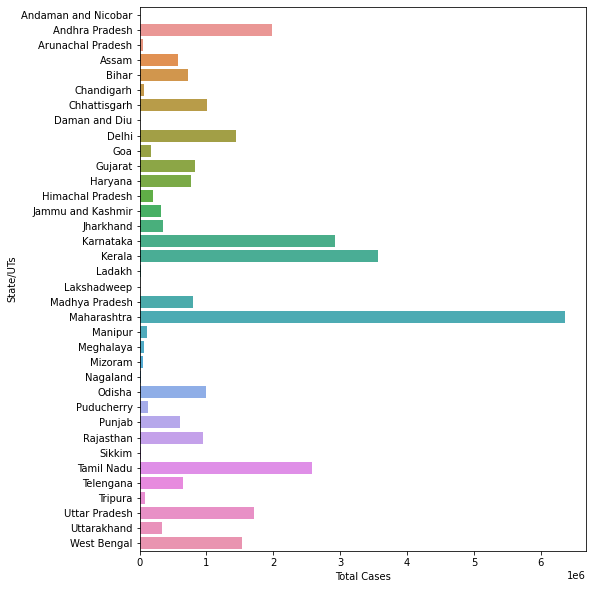

In [13]:
# Bar graph plot using seaborn

plt.figure(figsize=(8, 10))
sns.barplot(data = df, y="State/UTs", x="Total Cases")

-> In the above plot, we can clearly see that Maharashtra has the highest number of cases, followed by Kerala.

In [14]:
# To get more visual data
px.bar(df, x="State/UTs", y="Total Cases", color="Death Ratio (%)", title="Total Cases as per each State : ")

-> Even after having the highest number of covid cases in Maharashtra its death ratio is 2.1% while other state like Punjab have high death ratio i.e 2.72%
-> Similarly we can compare other states with one another to make a report on Death Ratio.

In [15]:
px.scatter(df, x='Active Ratio (%)',y='Death Ratio (%)', color=df['State/UTs'])

-> Here we can clearly see that Mizoram has the highest Active Ratio, of 27.35 %.
-> Also, Punjab has an Active Ratio of 0.07 % , but has the worst Death Ratio of 2.72 %.
-> Similarly, we can visualize this data for the rest of the states as well.

In [16]:
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State/UTs',
    color='Total Cases',
    color_continuous_scale='Reds'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

-> Here according to color bar scale the state which have higher number of cases will be dark red in color.
-> Even though graph is missing few states, but even after that its giving good information via visualization.

In [17]:
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State/UTs',
    color='Deaths',
    color_continuous_scale='Blues'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

-> Higher the number of deaths in each state, darker will the state in color.

-> From these two visualizations, we can conclude that Maharashtra is the worst affected state (as of now), in terms of number of Active Cases & the Total Number of Deaths.

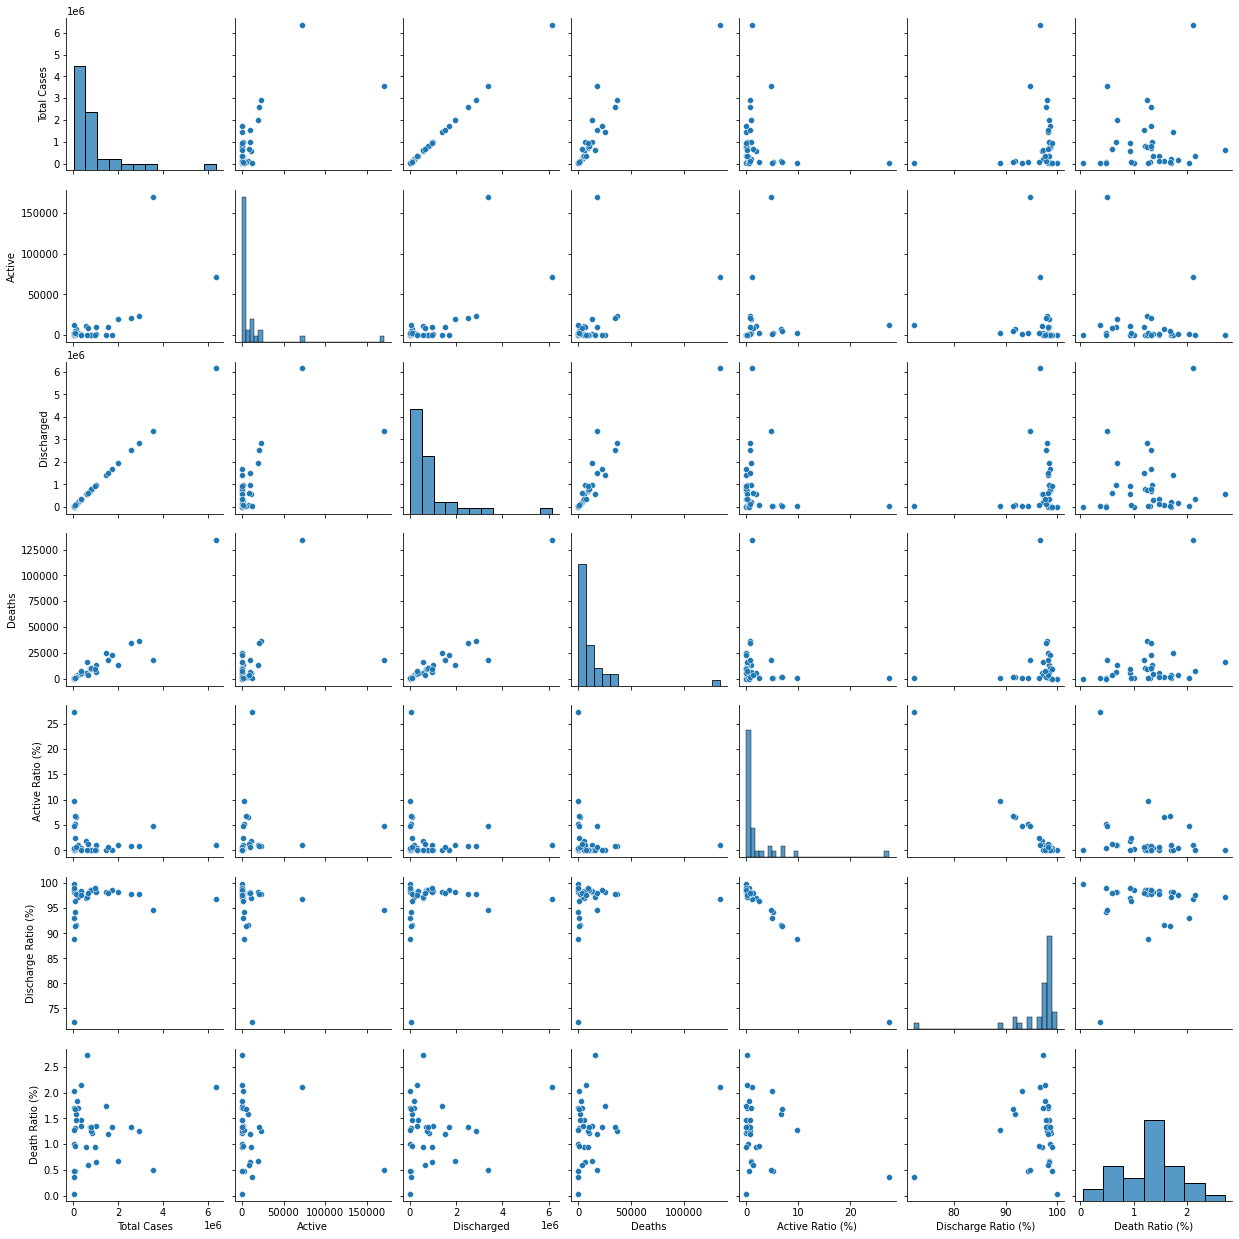

In [18]:
sns.pairplot(df)

In [19]:
px.density_heatmap(df, y="Total Cases", x="State/UTs", nbinsx=20, nbinsy=20,color_continuous_scale='Inferno_r')

In [20]:
#Histrogram 
px.density_heatmap(df, y="Total Cases", x="State/UTs", marginal_x="histogram", marginal_y="histogram",color_continuous_scale=px.colors.sequential.Viridis_r)

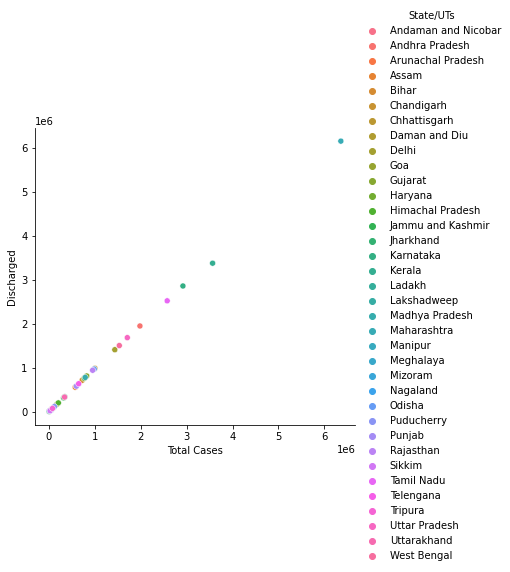

In [21]:
sns.relplot(x = 'Total Cases', y ='Discharged', hue = 'State/UTs', data = df)

In [22]:
fig = px.scatter_matrix(df, dimensions=["Total Cases", "Active", "Discharged", "Deaths"], color=df['State/UTs'])
fig.show()

-> Above graph shows us the relationship between different variables of all states of India.

In [23]:
fig = px.scatter(df, x="Total Cases", y="Active", size="Deaths", color=df['State/UTs'], log_x=True, size_max=50)
fig.show()

-> Above graph shows us that Maharastra have highest number of death.
-> Daman and Diu have lowest number of death.

In [24]:
px.scatter(df, x="Total Cases", y="Active",size="Active Ratio (%)", color="Active Ratio (%)",hover_name="State/UTs", log_x=True, size_max=60)

-> Above graph shows us that Mizoram has highest number of Active Ratio.

In [25]:
fig = px.pie(df, values='Total Cases', names=df['State/UTs'], title='Total Covid cases (%) in all states of India')
fig.show()

-> Above chart shows us that more than 50 % of covid cases in india are coming only from 4 to 5 states.

In [26]:
fig = px.pie(df, values='Discharge Ratio (%)', names=df['State/UTs'], title='Discharge Ratio (%) in all states of India')
fig.show()

-> Discharge ratio of each state is different as we can also see it from data.

In [27]:
# For pie chart which shows the Death Ratio in all states
fig = px.pie(df, values='Death Ratio (%)', names=df['State/UTs'], title='Death Ratio (%) in all states of India')
fig.show()

-> As stated before also, Punjab is the most affected state, in terms of Death Ratio (=2.72 %).
-> 5.99 % of the overall deaths in the country are from Punjab.
-> Least affected state/UT is Daman and Diu, with a Death Rate of 0.04 % & comprises of 0.088 % of the total deaths occured in the country.

In [28]:
# Relation between Deaths & total active cases
fig = px.scatter (df, x = "Active", y = "Deaths", template = "plotly_dark",  trendline="ols")
fig.show ()

## > Report

### Creating a detailed report using Mathematical Calculations 

In [29]:
# Total number of Covid-19 cases in India (till date)
sum(df['Total Cases'])

31998158

In [30]:
# Percentage of the Population affected by Covid = (Total Cases/Total Population)*100
Percentage_affected = ((31998158)/(1326093247))*100
Percentage_affected

2.4129644029474497

In [31]:
# State/UT haviing highest number of Covid Cases in India

highest_cases = df[df['Total Cases'] == max(df['Total Cases'])]
highest_cases

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
20  Maharashtra      6357833   71813     6151956  134064              1.13   

    Discharge Ratio (%)  Death Ratio (%)  
20                96.76             2.11

In [32]:
# State/UT having lowest number of Cases in India

lowest_cases = df[df['Total Cases'] == min(df['Total Cases'])]
lowest_cases

State/UTs  Total Cases  Active  Discharged  Deaths  \
0  Andaman and Nicobar         7546       5        7412     129   

   Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
0              0.07                98.22             1.71

In [33]:
# State/UT having highest number of Active cases in India

highest_active = df[df['Active'] == max(df['Active'])]
highest_active

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
16    Kerala      3565574  170031     3377691   17852              4.77   

    Discharge Ratio (%)  Death Ratio (%)  
16                94.73              0.5

In [34]:
# State/UT having Lowest number of Active cases in India

lowest_active = df[df['Active'] == min(df['Active'])]
lowest_active

State/UTs  Total Cases  Active  Discharged  Deaths  \
0  Andaman and Nicobar         7546       5        7412     129   

   Active Ratio (%)  Discharge Ratio (%)  Death Ratio (%)  
0              0.07                98.22             1.71

In [35]:
# State/UT having highest number of death ratio in India

highest_death_ratio = df[df['Death Ratio (%)'] == max(df['Death Ratio (%)'])]
highest_death_ratio

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
27    Punjab       599514     441      582753   16320              0.07   

    Discharge Ratio (%)  Death Ratio (%)  
27                 97.2             2.72

In [36]:
# State/UT having lowest number of death ratio in India

lowest_death_ratio = df[df['Death Ratio (%)'] == min(df['Death Ratio (%)'])]
lowest_death_ratio

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
7  Daman and Diu        10653       6       10643       4              0.06   

   Discharge Ratio (%)  Death Ratio (%)  
7                99.91             0.04

In [37]:
# State/UT having highest discharge ratio in India

highest_discharge_ratio = df[df['Discharge Ratio (%)'] == max(df['Discharge Ratio (%)'])]
highest_discharge_ratio

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
7  Daman and Diu        10653       6       10643       4              0.06   

   Discharge Ratio (%)  Death Ratio (%)  
7                99.91             0.04

In [38]:
# State/UT having lowest discharge ratio in India

lowest_discharge_ratio = df[df['Discharge Ratio (%)'] == min(df['Discharge Ratio (%)'])]
lowest_discharge_ratio

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
23   Mizoram        45457   12434       32854     169             27.35   

    Discharge Ratio (%)  Death Ratio (%)  
23                72.27             0.37

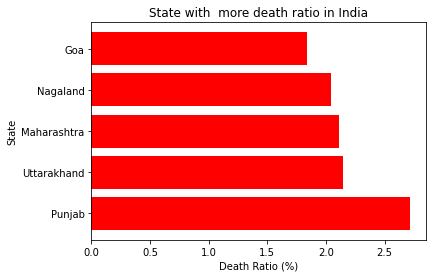

In [39]:
# Visualization of top 5 states/UT's having highest Death ratio in India

df1 = df.sort_values(by='Death Ratio (%)', ascending=False).head()
states = df1['State/UTs']
ratio = df1['Death Ratio (%)']
plt.barh(states, ratio,color='red')
plt.xlabel('Death Ratio (%)')
plt.ylabel('State')
plt.title('State with  more death ratio in India')
plt.show()

In [40]:
# Data freame of the states/UT's having highest Death Ratio in India
df1

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio (%)  \
27       Punjab       599514     441      582753   16320              0.07   
34  Uttarakhand       342423     446      334609    7368              0.13   
20  Maharashtra      6357833   71813     6151956  134064              1.13   
24     Nagaland        28709    1397       26727     585              4.87   
9           Goa       171944     896      167884    3164              0.52   

    Discharge Ratio (%)  Death Ratio (%)  
27                97.20             2.72  
34                97.72             2.15  
20                96.76             2.11  
24                93.10             2.04  
9                 97.64             1.84

-> By visualizing this Data, we can conclude that the Pandemic has affected these 5 states the most & hence, further actions/ steps should be taken accordingly.

## > Visualiazation & Analysis of the State-Wise Covid-19 Vaccination Data

In [41]:
import numpy as np 
import pandas as pd 
import seaborn as sns

df=pd.read_csv("Covid-19 State Wise Vaccination Data.csv")
df.drop([36],inplace=True)

In [42]:
dx=pd.read_csv("Covid-19 State Wise Vaccination Data.csv")
dx=dx.sort_values(by="State/UTs",ascending=True)
dx.drop([36],inplace=True)

In [43]:
#To insert 2 new columns for better analysis 

df["Populations"]=[380581,49576777,1383727,31205576,104099452,1055450,25545198,586956,16787941,1458545,60439692,25351462,6864602,12258433,32988134,61095297,33406061,274289,64473,72626809,112374333,2855794,2966889,1097206,1978502,41974218,1247953,27743338,68548437,610577,72147030,35004000,3673917,199812341,10086292,91276115]
df["Percentage Vaccinated"]=(df["Dose 2"]*100)/df["Populations"]

In [44]:
sum(df['Populations'])

1210846397

In [45]:
dx["Populations"]=[380581,49576777,1383727,31205576,104099452,1055450,25545198,586956,16787941,1458545,60439692,25351462,6864602,12258433,32988134,61095297,33406061,274289,64473,72626809,112374333,2855794,2966889,1097206,1978502,41974218,1247953,27743338,68548437,610577,72147030,35004000,3673917,199812341,10086292,91276115]

In [46]:
df.head(10).style.set_properties(**{'background-color':'black',
                                     'color': 'gold'})

In [47]:
df.describe().style.set_properties(**{'background-color':'black',
                                     'color': 'gold'})

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State/UTs                36 non-null     object 
 1   Dose 1                   36 non-null     int64  
 2   Dose 2                   36 non-null     int64  
 3   Total Vaccination Doses  36 non-null     int64  
 4   Populations              36 non-null     int64  
 5   Percentage Vaccinated    36 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.0+ KB


In [49]:
df1=df.sort_values(by="Total Vaccination Doses",ascending=False)
df2=df.sort_values(by="Dose 2",ascending=False)
df3=df.sort_values(by="Total Vaccination Doses")
df4=df.sort_values(by="Dose 2")
df5=df.sort_values(by="Percentage Vaccinated",ascending=False)
df6=df.sort_values(by="Percentage Vaccinated")

### To Analyze states with most number of Jabs given

#### This List Compares States/UTs Based On Total Number Of Vaccines Administered

In [50]:
dfsort1=df1.iloc[0:8]
df1.head(7).style.set_properties(**{'background-color':'black',
                                     'color': 'gold'})

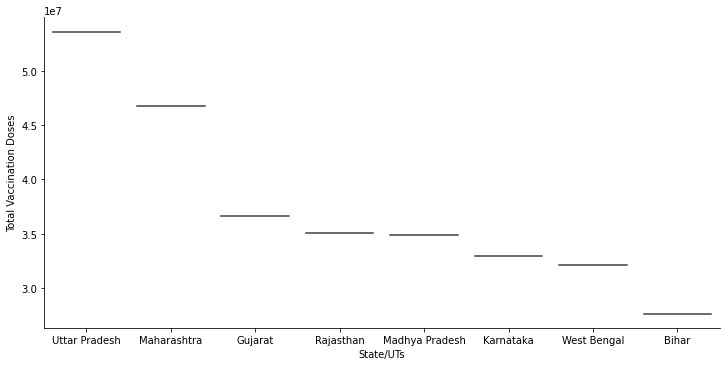

In [51]:
sns.catplot(x="State/UTs", y="Total Vaccination Doses", kind="boxen",
            data=dfsort1,aspect=2)

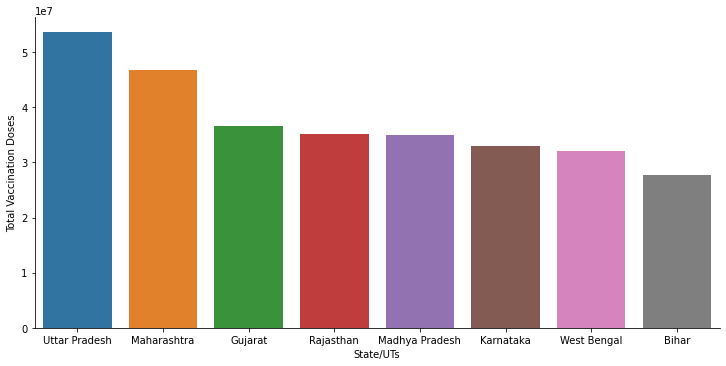

In [52]:
sns.catplot(x="State/UTs", y="Total Vaccination Doses", kind="bar",
            data=dfsort1,aspect=2)

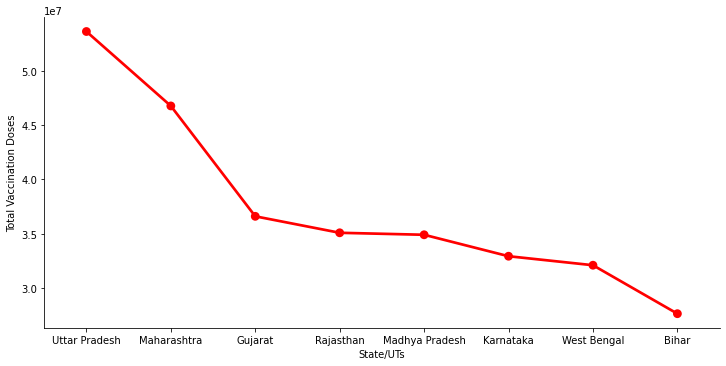

In [53]:
sns.catplot(x="State/UTs", y="Total Vaccination Doses", kind="point",
            data=dfsort1,aspect=2,color="red")

-> After the Visual Analysis of the above Data, we can conclude that Uttar Pradesh is the state, which has administered the highest number of Covid Vaccines.

### To analyse states with Highest Completely Vaccinated Populations

#### A Completely Vaccinated Person Is One Who Has Been Administered Both Vaccines 

In [54]:
dfsort2=df2.iloc[0:8]
df2.head(7).style.set_properties(**{'background-color':'black',
                                     'color': 'gold'})

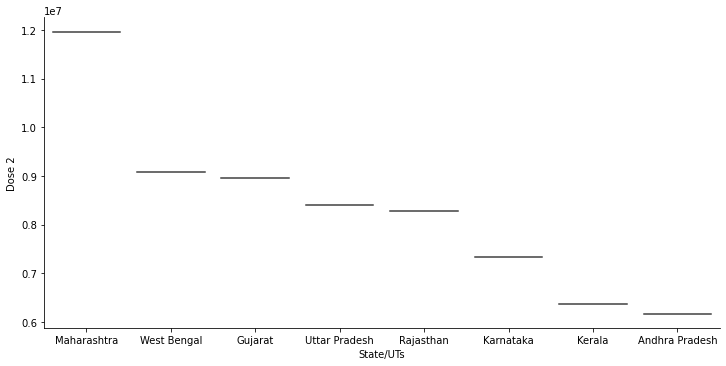

In [55]:
sns.catplot(x="State/UTs", y="Dose 2", kind="boxen",
            data=dfsort2,aspect=2)

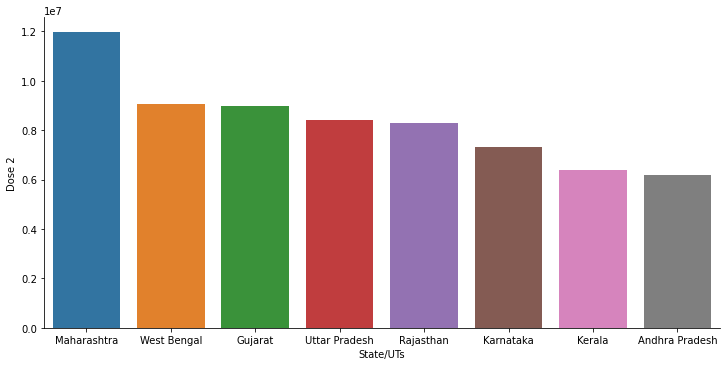

In [56]:
sns.catplot(x="State/UTs", y="Dose 2", kind="bar",
            data=dfsort2,aspect=2)

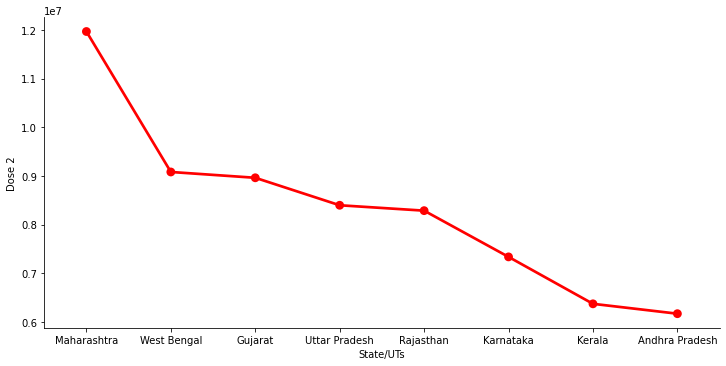

In [57]:
sns.catplot(x="State/UTs", y="Dose 2", kind="point",
            data=dfsort2,aspect=2,color="red")

-> After this particular Data Analysis, we can clearly see that Maharashtra is the state with the Highest Completed Vaccinations (Dose1+Dose2) in the country.

### Analysis of states with Lowest Number of Vaccinations

In [58]:
dfsort3=df3.iloc[0:8]
df3.head(7).style.set_properties(**{'background-color':'black',
                                     'color': 'gold'})

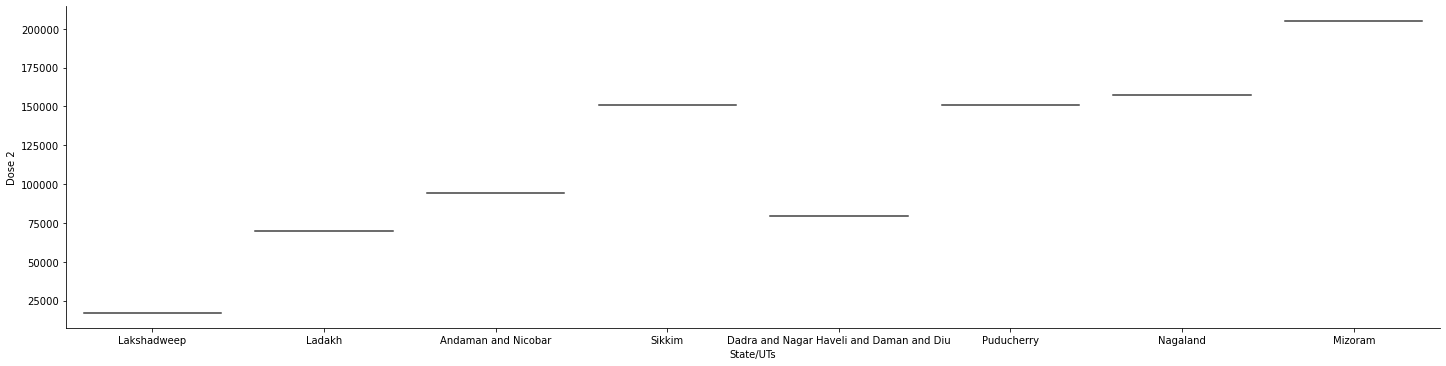

In [59]:
sns.catplot(x="State/UTs", y="Dose 2", kind="boxen",
            data=dfsort3,aspect=4)

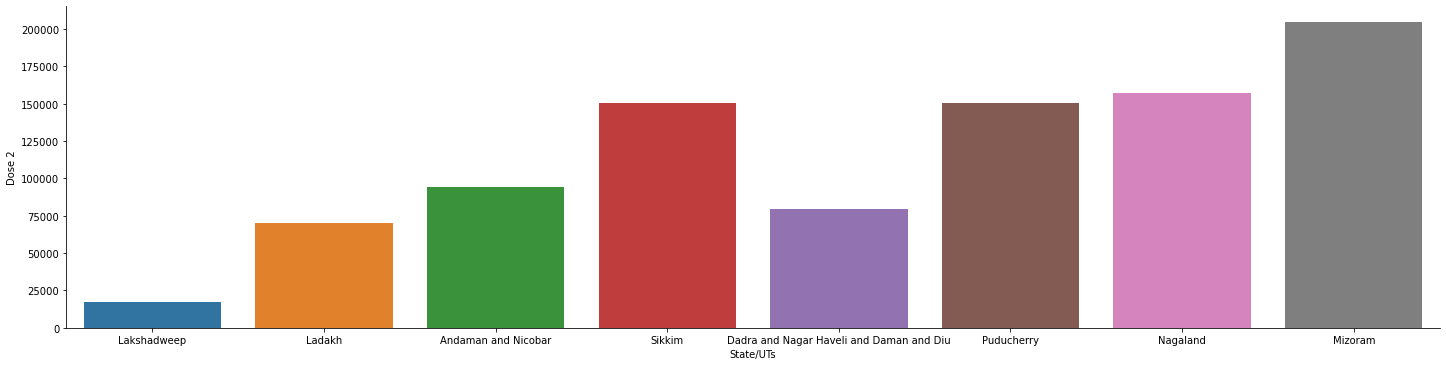

In [60]:
sns.catplot(x="State/UTs", y="Dose 2", kind="bar",
            data=dfsort3,aspect=4)

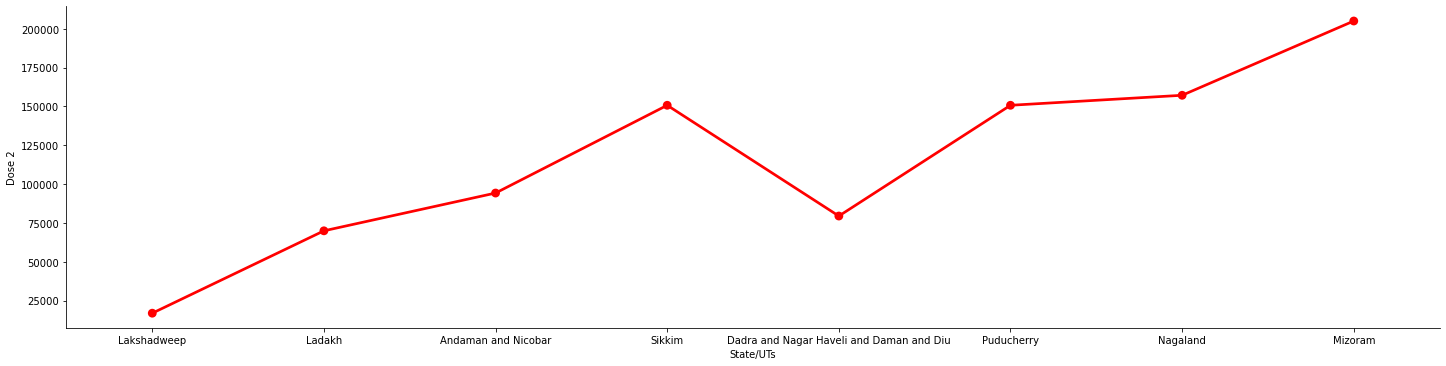

In [61]:
sns.catplot(x="State/UTs", y="Dose 2", kind="point",
            data=dfsort3,aspect=4,color="red")

-> Post Data Analysis of the above data, we can conclude that Lakshadweep is the only state/UT, which has completed the lowest number of Vaccinations.

### Analysis of States with Lowest number of Completely Vaccinated Populations

In [62]:
dfsort4=df4.iloc[0:8]
df4.head(7).style.set_properties(**{'background-color':'black',
                                     'color': 'gold'})

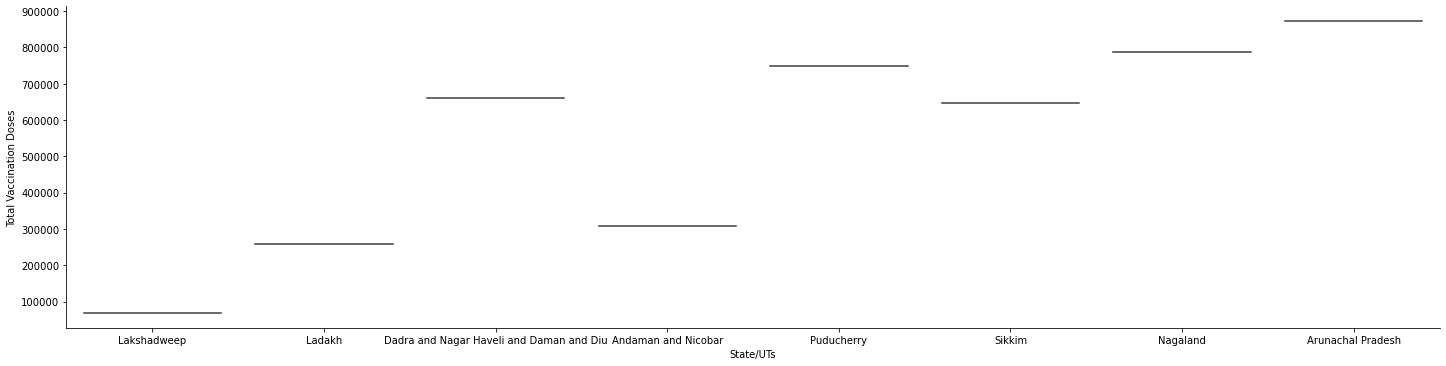

In [63]:
sns.catplot(x="State/UTs", y="Total Vaccination Doses", kind="boxen",
            data=dfsort4,aspect=4)

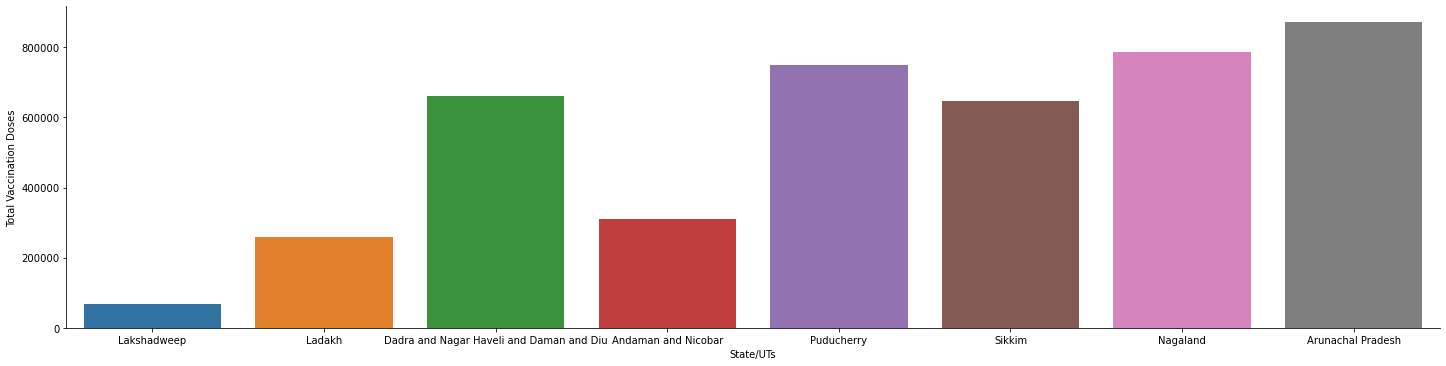

In [64]:
sns.catplot(x="State/UTs", y="Total Vaccination Doses", kind="bar",
            data=dfsort4,aspect=4)

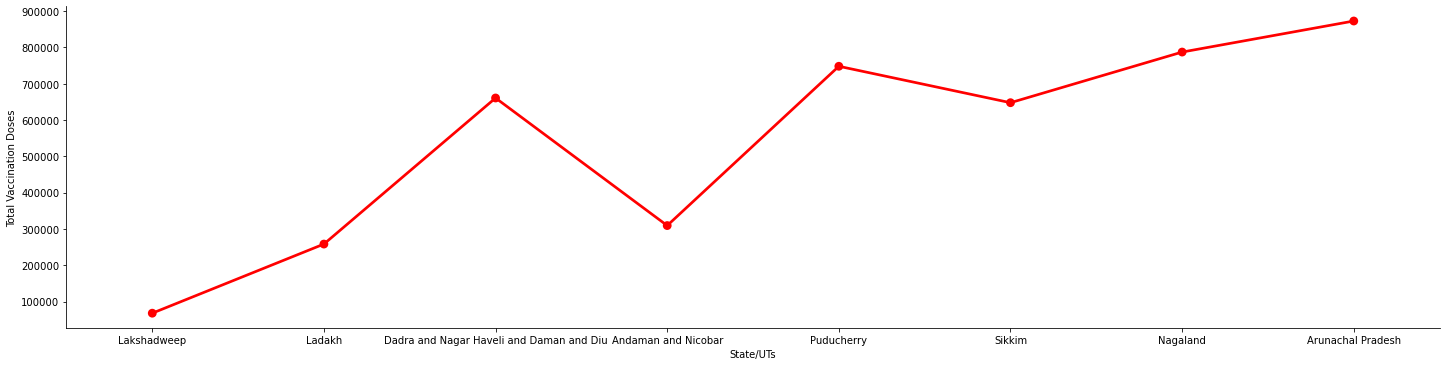

In [65]:
sns.catplot(x="State/UTs", y="Total Vaccination Doses", kind="point",
            data=dfsort4,aspect=4,color="red")

-> On the basis of the above Data Visualization, we can conclude that Lakshadweep is the state/UT, which has the lowest number of completely vaccinated population.

### Analysis of States with Highest Percantage of Completely Vaccinated Populations

In [66]:
dfsort5=df5.iloc[1:8]
dfsort5.head(7).style.set_properties(**{'background-color':'black',
                                     'color': 'gold'})

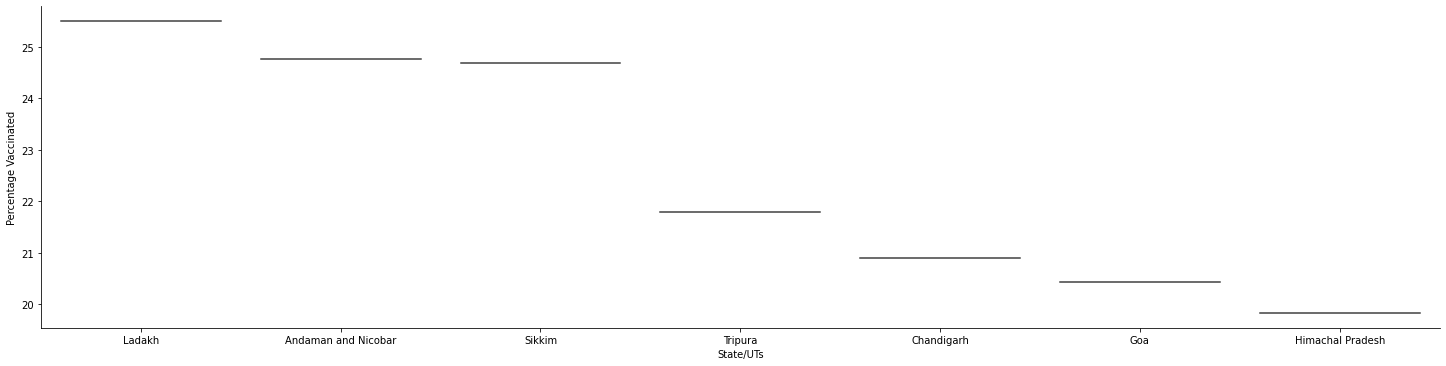

In [67]:
sns.catplot(x="State/UTs", y="Percentage Vaccinated", kind="boxen",
            data=dfsort5,aspect=4)

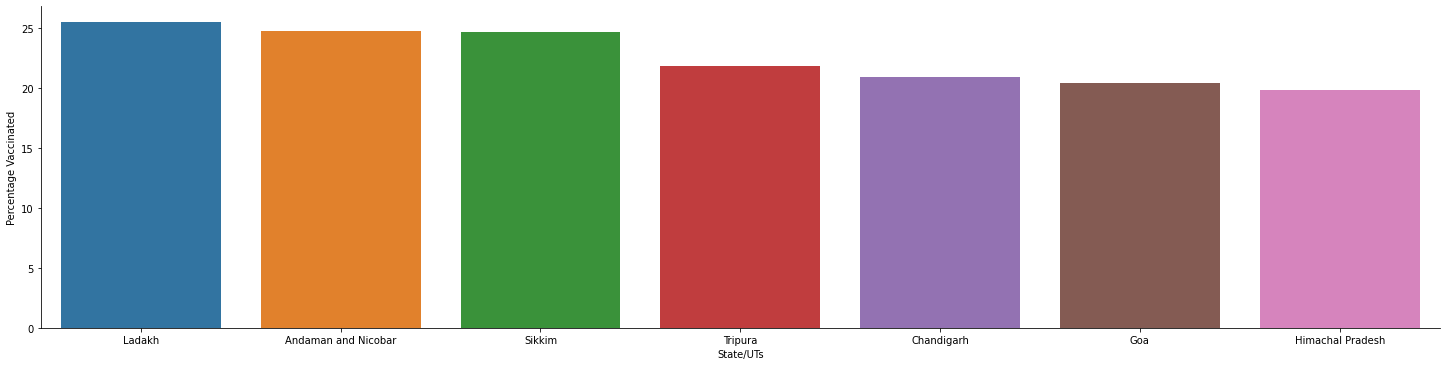

In [68]:
sns.catplot(x="State/UTs", y="Percentage Vaccinated", kind="bar",
            data=dfsort5,aspect=4)

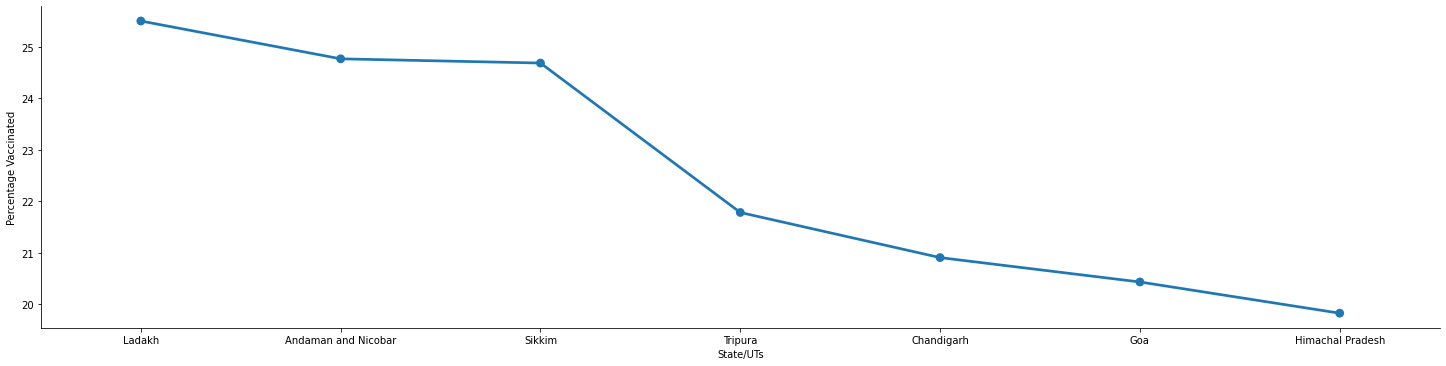

In [69]:
sns.catplot(x="State/UTs", y="Percentage Vaccinated", kind="point",
            data=dfsort5,aspect=4)

-> On visualizing the above Data, we can conclude that Ladakh is the only state/UT in the country which has the higest percentage of its population completely Vaccinated.

### Analysis of States with Lowest Percentage of Completely Vaccinated Populations

In [70]:
dfsort6=df6.iloc[0:8]
df6.head(7).style.set_properties(**{'background-color':'black',
                                     'color': 'gold'})

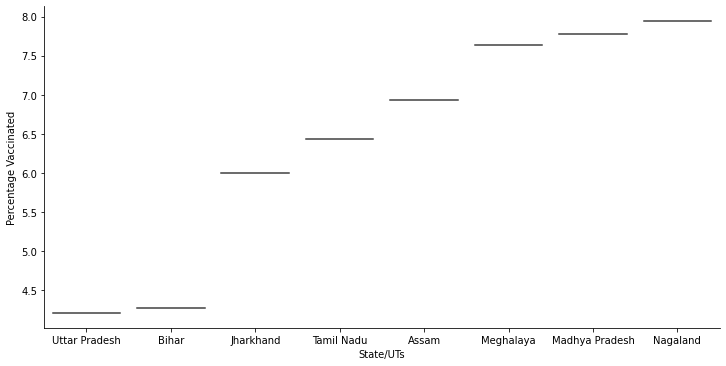

In [71]:
sns.catplot(x="State/UTs", y="Percentage Vaccinated", kind="boxen",
            data=dfsort6,aspect=2)

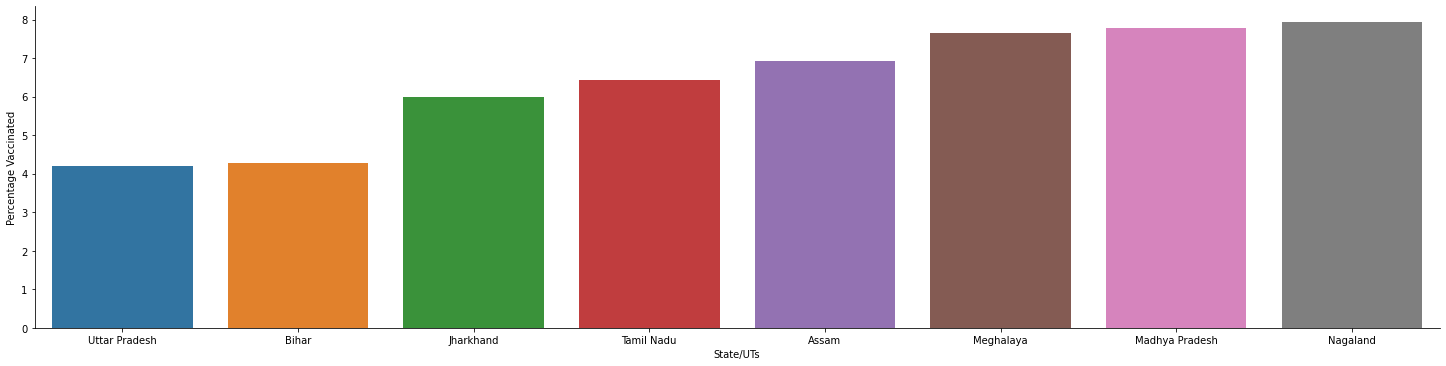

In [72]:
sns.catplot(x="State/UTs", y="Percentage Vaccinated", kind="bar",
            data=dfsort6,aspect=4)


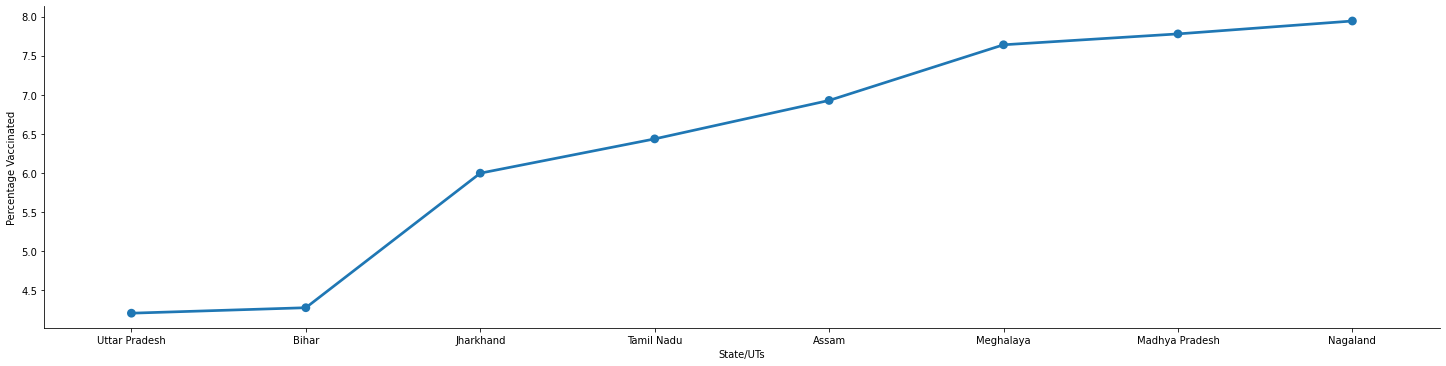

In [73]:
sns.catplot(x="State/UTs", y="Percentage Vaccinated", kind="point",
            data=dfsort6,aspect=4)

-> Uttar Pradesh is the only state with the Lowest percentage of Completely Vaccinated population.

### Analysis of Delhi's Vaccination Drive

In [74]:
df["Percentage Vaccinated"].mean()

13.559949211383335

In [75]:
df[df["State/UTs"]=="Delhi"]["Percentage Vaccinated"].mean()

17.51752641970805

-> According to this statistic, we can conclude that Delhi, in particular, has vaccinated roughly 4 % more than the National Mean of % of Vaccinations.

-> Also, we can conclude that till now only 13.55 % of our overall population has been vaccinated. To achieve Herd Immunity in the whole country, we need to vaccinate at a much quicker rate. To achieve Herd Immunity, atleast 60 % of the population should either already be immune to the deadly disease or be Vaccinated.
On analysis of both - % of people Vaccinated & % of people affected by Covid-19 (till date), we can conclude that only 16 % (13.55 % + 2.41 %) of our population has either been affected by Covid or have been fully vaccinated, i.e. Immune to the deadly virus. Hence, we are still far away from achieving Herd Immunity.

## > COVID-19 Vaccination Prediction for India 

### Forecasting using NeuralProphet

In [76]:
!pip install neuralprophet
# Read in vaccination data


In [77]:
import pandas as pd
from neuralprophet import NeuralProphet
df = pd.read_csv("vaccination.csv")

**Preprocessing the data to the state where it is ready for modelling**

In [78]:
df.isnull().sum()

Updated On                               0
State                                    0
Total Doses Administered                 0
Total Sessions Conducted                 0
Total Sites                              0
First Dose Administered                  0
Second Dose Administered                 0
Male(Individuals Vaccinated)             0
Female(Individuals Vaccinated)           0
Transgender(Individuals Vaccinated)      0
Total Covaxin Administered               0
Total CoviShield Administered            0
Total Sputnik V Administered           125
AEFI                                    59
18-45 years (Age)                       59
45-60 years (Age)                       59
60+ years (Age)                         59
Total Individuals Vaccinated             0
dtype: int64

In [79]:
df.drop(['Total Sessions Conducted', 'Total Sites ', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered',
       'Total Sputnik V Administered', 'AEFI', '18-45 years (Age)',
       '45-60 years (Age)', '60+ years (Age)', 'Total Individuals Vaccinated'],axis=1,inplace=True)

In [80]:
df

Updated On  State  Total Doses Administered  \
0    16 January 2021  India                     48276   
1    17 January 2021  India                     58604   
2    18 January 2021  India                     99449   
3    19 January 2021  India                    195525   
4    20 January 2021  India                    251280   
..               ...    ...                       ...   
167     02 July 2021  India                 339447068   
168     03 July 2021  India                 346054022   
169     04 July 2021  India                 347766247   
170     05 July 2021  India                 352412289   
171     06 July 2021  India                 356192949   

     First Dose Administered  Second Dose Administered  
0                      48276                         0  
1                      58604                         0  
2                      99449                         0  
3                     195525                         0  
4                     251280                         0  
..                       ...                       ...  
167                279132514                  60314554  
168                283527017                  62527005  
169                284750483                  63015764  
170                287588808                  64823481  
171                290132865                  66060084  

[172 rows x 5 columns]

In [81]:
df.State.unique()

array(['India'], dtype=object)

In [82]:
df.dtypes

Updated On                  object
State                       object
Total Doses Administered     int64
First Dose Administered      int64
Second Dose Administered     int64
dtype: object

In [83]:
df['Updated On'] = pd.to_datetime(df['Updated On'])

In [84]:
df

Updated On  State  Total Doses Administered  First Dose Administered  \
0   2021-01-16  India                     48276                    48276   
1   2021-01-17  India                     58604                    58604   
2   2021-01-18  India                     99449                    99449   
3   2021-01-19  India                    195525                   195525   
4   2021-01-20  India                    251280                   251280   
..         ...    ...                       ...                      ...   
167 2021-07-02  India                 339447068                279132514   
168 2021-07-03  India                 346054022                283527017   
169 2021-07-04  India                 347766247                284750483   
170 2021-07-05  India                 352412289                287588808   
171 2021-07-06  India                 356192949                290132865   

     Second Dose Administered  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
..                        ...  
167                  60314554  
168                  62527005  
169                  63015764  
170                  64823481  
171                  66060084  

[172 rows x 5 columns]

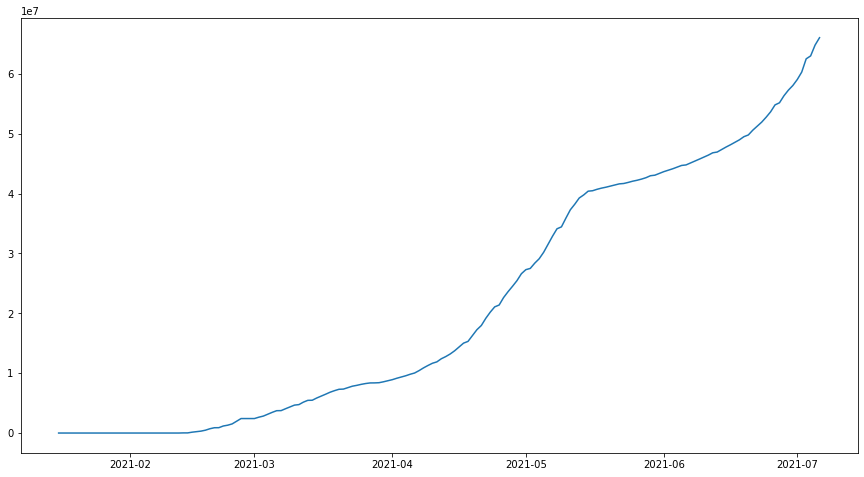

In [85]:
plt.figure(figsize = (15,8))
plt.plot(df['Updated On'],df['Second Dose Administered'])

In [86]:
data = df[['Updated On','Second Dose Administered']]
data.columns = ['ds', 'y'] 
data.head()

ds  y
0 2021-01-16  0
1 2021-01-17  0
2 2021-01-18  0
3 2021-01-19  0
4 2021-01-20  0

In [87]:
data.shape

(172, 2)

In [88]:
m = NeuralProphet()
#start the training
model = m.fit(data, freq='M',validate_each_epoch=True)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 295


  0%|          | 0/208 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.72E-01, min: 2.46E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.18E+00
Epoch[295/295]: 100%|█| 295/295 [00:16<00:00, 18.36it/s, SmoothL1Loss=0.000107, MAE=3.63e+5, MSE=3.87e+11, RegLoss=0, M


In [89]:
future=m.make_future_dataframe(data, periods=6,n_historic_predictions=len(data))

In [90]:
forecast = m.predict(future)
forecast.head()

ds  y          yhat1      residual1         trend  season_weekly
0 2021-01-16  0  132533.507599  132533.507599  28242.943366  104290.564233
1 2021-01-17  0  -93442.690791  -93442.690791  20143.497027 -113586.184113
2 2021-01-18  0  -60280.322750   -60280.32275  12044.050688  -72324.375908
3 2021-01-19  0  -38994.709867  -38994.709867   3944.603115  -42939.312982
4 2021-01-20  0  -75885.361368  -75885.361368  -4154.841989  -71730.519379

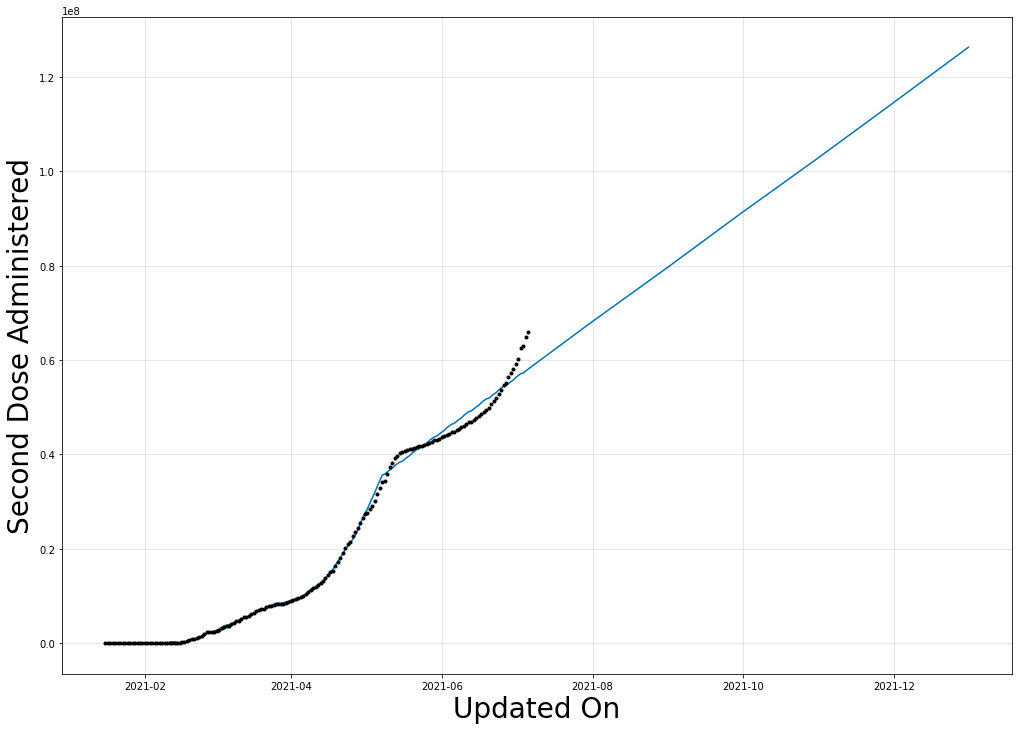

In [91]:
fig, ax = plt.subplots(figsize=(14, 10))
m.plot(forecast, xlabel="Updated On", ylabel="Second Dose Administered", ax=ax)
ax.xaxis.label.set_size(28) 
ax.yaxis.label.set_size(28)

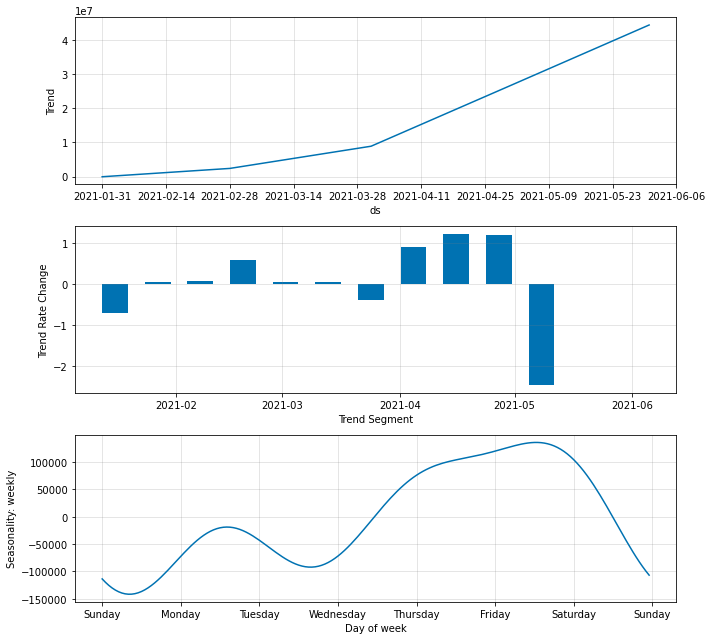

In [92]:
fig_param = m.plot_parameters()

In [93]:
df1=forecast[forecast['ds']>'2021-07-21']

In [94]:
t=sum(df1['yhat1'])

In [95]:
per_dec2021=(t/1380004385)*100
per_dec2021

42.15612363377391

In [96]:
herd_immunity = (per_dec2021+13.55)
herd_immunity

55.70612363377391

-> According to our prediction using Neural Prophet we will achieve herd immunity by around Mid-January 2022. 
-> Therefore, it is not feasible to open schools/colleges atleast before January. So, to achieve Herd Immunity before that & hence, re-open schools & colleges in the near future, the Vaccination Rate has to be increased.


### ForeCasting using FbProphet

In [97]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
df = pd.read_csv("vaccination.csv")

In [99]:
df

Updated On  State  Total Doses Administered  \
0    16 January 2021  India                     48276   
1    17 January 2021  India                     58604   
2    18 January 2021  India                     99449   
3    19 January 2021  India                    195525   
4    20 January 2021  India                    251280   
..               ...    ...                       ...   
167     02 July 2021  India                 339447068   
168     03 July 2021  India                 346054022   
169     04 July 2021  India                 347766247   
170     05 July 2021  India                 352412289   
171     06 July 2021  India                 356192949   

     Total Sessions Conducted  Total Sites   First Dose Administered  \
0                        3455          2957                    48276   
1                        8532          4954                    58604   
2                       13611          6583                    99449   
3                       17855          7951                   195525   
4                       25472         10504                   251280   
..                        ...           ...                      ...   
167                  20812325         40091                279132514   
168                  26140934         48778                283527017   
169                  12321517         19122                284750483   
170                  20486897         42139                287588808   
171                  17691841         35607                290132865   

     Second Dose Administered  Male(Individuals Vaccinated)  \
0                           0                         23757   
1                           0                         27348   
2                           0                         41361   
3                           0                         81901   
4                           0                         98111   
..                        ...                           ...   
167                  60314554                     182375868   
168                  62527005                     185856473   
169                  63015764                     186748495   
170                  64823481                     189175605   
171                  66060084                     191160373   

     Female(Individuals Vaccinated)  Transgender(Individuals Vaccinated)  \
0                             24517                                    2   
1                             31252                                    4   
2                             58083                                    5   
3                            113613                                   11   
4                            153145                                   24   
..                              ...                                  ...   
167                       157013277                                57923   
168                       160138342                                59207   
169                       160958198                                59554   
170                       163176110                                60574   
171                       164971125                                61451   

     Total Covaxin Administered  Total CoviShield Administered  \
0                           579                          47697   
1                           635                          57969   
2                          1299                          98150   
3                          3017                         192508   
4                          3946                         247334   
..                          ...                            ...   
167                    41530884                      297814896   
168                    42506166                      303438000   
169                    42729197                      304924760   
170                    43442864                      308849054   
171                    44018800                      312045416  

In [100]:
df.head()

Updated On  State  Total Doses Administered  Total Sessions Conducted  \
0  16 January 2021  India                     48276                      3455   
1  17 January 2021  India                     58604                      8532   
2  18 January 2021  India                     99449                     13611   
3  19 January 2021  India                    195525                     17855   
4  20 January 2021  India                    251280                     25472   

   Total Sites   First Dose Administered  Second Dose Administered  \
0          2957                    48276                         0   
1          4954                    58604                         0   
2          6583                    99449                         0   
3          7951                   195525                         0   
4         10504                   251280                         0   

   Male(Individuals Vaccinated)  Female(Individuals Vaccinated)  \
0                         23757                           24517   
1                         27348                           31252   
2                         41361                           58083   
3                         81901                          113613   
4                         98111                          153145   

   Transgender(Individuals Vaccinated)  Total Covaxin Administered  \
0                                    2                         579   
1                                    4                         635   
2                                    5                        1299   
3                                   11                        3017   
4                                   24                        3946   

   Total CoviShield Administered  Total Sputnik V Administered  AEFI  \
0                          47697                           NaN   NaN   
1                          57969                           NaN   NaN   
2                          98150                           NaN   NaN   
3                         192508                           NaN   NaN   
4                         247334                           NaN   NaN   

   18-45 years (Age)  45-60 years (Age)  60+ years (Age)  \
0                NaN                NaN              NaN   
1                NaN                NaN              NaN   
2                NaN                NaN              NaN   
3                NaN                NaN              NaN   
4                NaN                NaN              NaN   

   Total Individuals Vaccinated  
0                         48276  
1                         58604  
2                         99449  
3                        195525  
4                        251280

In [101]:
df.tail()

Updated On  State  Total Doses Administered  Total Sessions Conducted  \
167  02 July 2021  India                 339447068                  20812325   
168  03 July 2021  India                 346054022                  26140934   
169  04 July 2021  India                 347766247                  12321517   
170  05 July 2021  India                 352412289                  20486897   
171  06 July 2021  India                 356192949                  17691841   

     Total Sites   First Dose Administered  Second Dose Administered  \
167         40091                279132514                  60314554   
168         48778                283527017                  62527005   
169         19122                284750483                  63015764   
170         42139                287588808                  64823481   
171         35607                290132865                  66060084   

     Male(Individuals Vaccinated)  Female(Individuals Vaccinated)  \
167                     182375868                       157013277   
168                     185856473                       160138342   
169                     186748495                       160958198   
170                     189175605                       163176110   
171                     191160373                       164971125   

     Transgender(Individuals Vaccinated)  Total Covaxin Administered  \
167                                57923                    41530884   
168                                59207                    42506166   
169                                59554                    42729197   
170                                60574                    43442864   
171                                61451                    44018800   

     Total CoviShield Administered  Total Sputnik V Administered     AEFI  \
167                      297814896                      101288.0  23467.0   
168                      303438000                      109856.0  23695.0   
169                      304924760                      112290.0  23780.0   
170                      308849054                      120371.0  23798.0   
171                      312045416                      128733.0  23960.0   

     18-45 years (Age)  45-60 years (Age)  60+ years (Age)  \
167        126985291.0        117838292.0       94623485.0   
168        130761114.0        119730672.0       95562236.0   
169        131760228.0        120219354.0       95786665.0   
170        134087877.0        121768778.0       96555634.0   
171        136158617.0        122916328.0       97118004.0   

     Total Individuals Vaccinated  
167                     279132514  
168                     283527017  
169                     284750483  
170                     287588808  
171                     290132865

<AxesSubplot:>

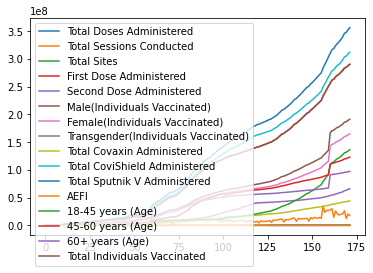

In [102]:
df.plot()

In [103]:
data = df[['Updated On','Second Dose Administered']]
data.columns = ['ds', 'y'] 
data

ds         y
0    16 January 2021         0
1    17 January 2021         0
2    18 January 2021         0
3    19 January 2021         0
4    20 January 2021         0
..               ...       ...
167     02 July 2021  60314554
168     03 July 2021  62527005
169     04 July 2021  63015764
170     05 July 2021  64823481
171     06 July 2021  66060084

[172 rows x 2 columns]

In [104]:
data.head()

ds  y
0  16 January 2021  0
1  17 January 2021  0
2  18 January 2021  0
3  19 January 2021  0
4  20 January 2021  0

In [105]:
data.tail()

ds         y
167  02 July 2021  60314554
168  03 July 2021  62527005
169  04 July 2021  63015764
170  05 July 2021  64823481
171  06 July 2021  66060084

In [106]:
data["ds"] = pd.to_datetime(data["ds"])

In [107]:
data

ds         y
0   2021-01-16         0
1   2021-01-17         0
2   2021-01-18         0
3   2021-01-19         0
4   2021-01-20         0
..         ...       ...
167 2021-07-02  60314554
168 2021-07-03  62527005
169 2021-07-04  63015764
170 2021-07-05  64823481
171 2021-07-06  66060084

[172 rows x 2 columns]

In [108]:
data.head()

ds  y
0 2021-01-16  0
1 2021-01-17  0
2 2021-01-18  0
3 2021-01-19  0
4 2021-01-20  0

In [109]:
data.tail()

ds         y
167 2021-07-02  60314554
168 2021-07-03  62527005
169 2021-07-04  63015764
170 2021-07-05  64823481
171 2021-07-06  66060084

In [110]:
from fbprophet import Prophet

In [111]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [112]:
model = Prophet()

In [113]:
data.columns

Index(['ds', 'y'], dtype='object')

In [114]:
data.dropna(axis=0,inplace=True)

In [115]:
data.head()

ds  y
0 2021-01-16  0
1 2021-01-17  0
2 2021-01-18  0
3 2021-01-19  0
4 2021-01-20  0

In [116]:
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [117]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [118]:
data.tail()

ds         y
167 2021-07-02  60314554
168 2021-07-03  62527005
169 2021-07-04  63015764
170 2021-07-05  64823481
171 2021-07-06  66060084

In [119]:
future_dates = model.make_future_dataframe(periods=6,freq="M")

In [120]:
future_dates.head()

ds
0 2021-01-16
1 2021-01-17
2 2021-01-18
3 2021-01-19
4 2021-01-20

In [121]:
future_dates.tail()

ds
173 2021-08-31
174 2021-09-30
175 2021-10-31
176 2021-11-30
177 2021-12-31

In [122]:
prediction = model.predict(future_dates)

In [123]:
prediction

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2021-01-16 -3.636202e+05 -1.494893e+06  1.087248e+06 -3.636202e+05   
1   2021-01-17 -3.406565e+05 -1.764961e+06  8.644164e+05 -3.406565e+05   
2   2021-01-18 -3.176927e+05 -1.680865e+06  1.065182e+06 -3.176927e+05   
3   2021-01-19 -2.947289e+05 -1.470111e+06  1.093605e+06 -2.947289e+05   
4   2021-01-20 -2.717651e+05 -1.715680e+06  8.723330e+05 -2.717651e+05   
..         ...           ...           ...           ...           ...   
173 2021-08-31  8.964770e+07  7.797091e+07  1.008265e+08  7.802996e+07   
174 2021-09-30  1.051471e+08  8.255487e+07  1.275300e+08  8.271405e+07   
175 2021-10-31  1.211631e+08  8.438652e+07  1.585161e+08  8.437858e+07   
176 2021-11-30  1.366625e+08  8.474932e+07  1.894734e+08  8.490834e+07   
177 2021-12-31  1.526785e+08  8.446180e+07  2.222672e+08  8.462515e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -3.636202e+05   120183.250688         120183.250688         120183.250688   
1   -3.406565e+05  -108471.249383        -108471.249383        -108471.249383   
2   -3.176927e+05    22927.365013          22927.365013          22927.365013   
3   -2.947289e+05    99652.326583          99652.326583          99652.326583   
4   -2.717651e+05  -119530.366103        -119530.366103        -119530.366103   
..            ...             ...                   ...                   ...   
173  1.007600e+08    99652.326583          99652.326583          99652.326583   
174  1.277053e+08   -45835.846600         -45835.846600         -45835.846600   
175  1.589977e+08  -108471.249383        -108471.249383        -108471.249383   
176  1.894422e+08    99652.326582          99652.326582          99652.326582   
177  2.220856e+08    31074.519803          31074.519803          31074.519803   

            weekly   weekly_lower   weekly_upper  multiplicative_terms  \
0    120183.250688  120183.250688  120183.250688                   0.0   
1   -108471.249383 -108471.249383 -108471.249383                   0.0   
2     22927.365013   22927.365013   22927.365013                   0.0   
3     99652.326583   99652.326583   99652.326583                   0.0   
4   -119530.366103 -119530.366103 -119530.366103                   0.0   
..             ...            ...            ...                   ...   
173   99652.326583   99652.326583   99652.326583                   0.0   
174  -45835.846600  -45835.846600  -45835.846600                   0.0   
175 -108471.249383 -108471.249383 -108471.249383                   0.0   
176   99652.326582   99652.326582   99652.326582                   0.0   
177   31074.519803   31074.519803   31074.519803                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -2.434370e+05  
1                           0.0                         0.0 -4.491277e+05  
2                           0.0                         0.0 -2.947653e+05  
3                           0.0                         0.0 -1.950765e+05  
4                           0.0                         0.0 -3.912954e+05  
..                          ...                         ...           ...  
173                         0.0                         0.0  8.974735e+07  
174                         0.0                         0.0  1.051012e+08  
175                         0.0                         0.0  1.210546e+08  
176                         0.0                         0.0  1.367621e+08  
177                         0.0                         0.0  1.527096e+08  

[178 rows x 16 columns]

In [124]:
prediction.head()

ds          trend    yhat_lower    yhat_upper    trend_lower  \
0 2021-01-16 -363620.248272 -1.494893e+06  1.087248e+06 -363620.248272   
1 2021-01-17 -340656.453828 -1.764961e+06  8.644164e+05 -340656.453828   
2 2021-01-18 -317692.659385 -1.680865e+06  1.065182e+06 -317692.659385   
3 2021-01-19 -294728.864941 -1.470111e+06  1.093605e+06 -294728.864941   
4 2021-01-20 -271765.070498 -1.715680e+06  8.723330e+05 -271765.070498   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0 -363620.248272   120183.250688         120183.250688         120183.250688   
1 -340656.453828  -108471.249383        -108471.249383        -108471.249383   
2 -317692.659385    22927.365013          22927.365013          22927.365013   
3 -294728.864941    99652.326583          99652.326583          99652.326583   
4 -271765.070498  -119530.366103        -119530.366103        -119530.366103   

          weekly   weekly_lower   weekly_upper  multiplicative_terms  \
0  120183.250688  120183.250688  120183.250688                   0.0   
1 -108471.249383 -108471.249383 -108471.249383                   0.0   
2   22927.365013   22927.365013   22927.365013                   0.0   
3   99652.326583   99652.326583   99652.326583                   0.0   
4 -119530.366103 -119530.366103 -119530.366103                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                         0.0                         0.0 -243436.997584  
1                         0.0                         0.0 -449127.703211  
2                         0.0                         0.0 -294765.294372  
3                         0.0                         0.0 -195076.538358  
4                         0.0                         0.0 -391295.436601

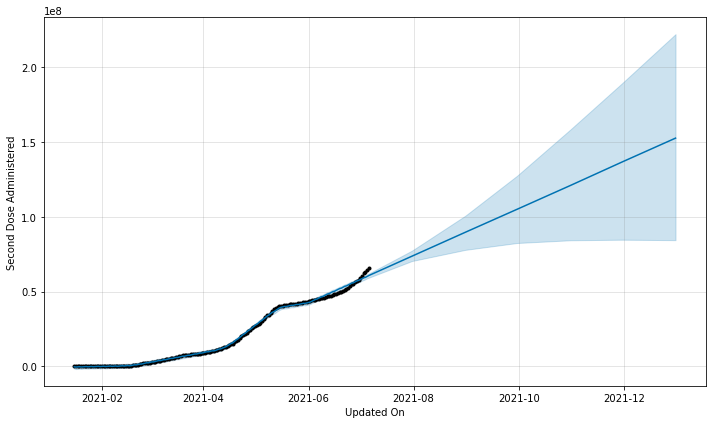

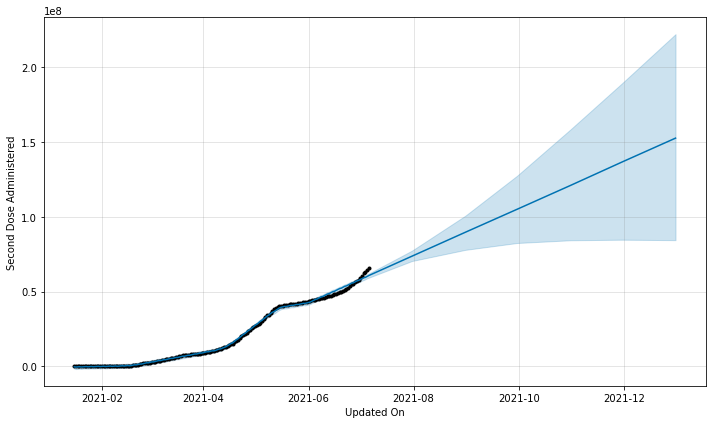

In [125]:
model.plot(prediction, xlabel="Updated On", ylabel="Second Dose Administered")

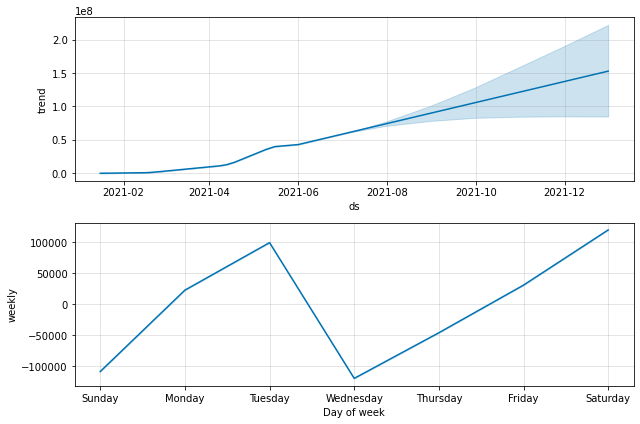

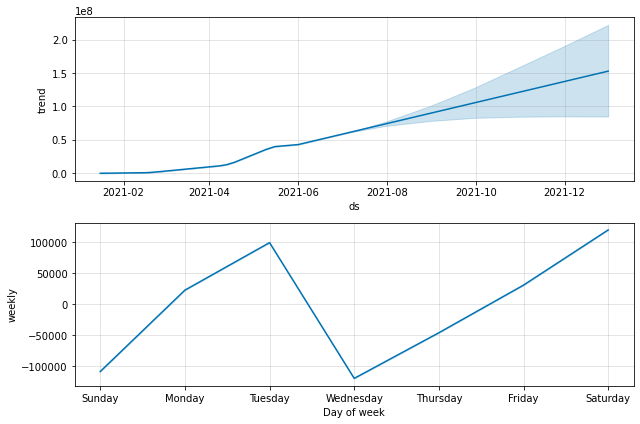

In [126]:
model.plot_components(prediction)

In [127]:
df1 = prediction[prediction["ds"]>"2021-07-21"]

In [128]:
s = sum(df1["yhat"])
s

679126765.3250803

In [129]:
per_Dec2021=(s/1380004385)*100
per_Dec2021

49.21192807116191

-> According to our prediction using FbProphet we will achieve herd immunity by around **End-December 2021**.                   
-> Therefore like mentioned before also, on comparing the accuracy of both the Models (Neural & Fb prophet), we can conclude that it is not feasible to open schools/colleges **atleast before January**. So, to achieve Herd Immunity before that & hence, re-open schools & colleges in the near future, the Vaccination Rate has to be increased.
